# Lung Cancer detection using CNN
- Computer Vision is one of the applications of deep neural networks that enables us to automate tasks that earlier required years of expertise and one such use in predicting the presence of cancerous cells.

- In this project, we will learn how to build a classifier using a simple Convolution Neural Network which can classify normal lung tissues from cancerous. This project has been developed using collab and the dataset has been taken from Kaggle whose link has been provided as well

In [2]:
!pip install tensorflow

     -------------------------------------- 61.2/61.2 kB 467.5 kB/s eta 0:00:00
   ---------------------------------------- 15.8/15.8 MB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 430.5/430.5 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 3.7/3.7 MB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 182.3/182.3 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:
      Successfully uninstalled protobuf-3.19.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.33.0
    Uninstalling google-auth-1.33.0:
      Succes

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
arviz 0.11.2 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.7.1 which is incompatible.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.23.3 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.23.3 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.23.3 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.1 which is incompatible.
prophet 1.0.1 requires cmdstanpy==0.9.68, but you have cmdstanpy 1.1.0 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.1 which is incompatible.


In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from PIL import Image
from glob import glob

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

C:\Users\yashp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
import cv2
import gc
import os

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [7]:
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset
This dataset includes 5000 images for three classes of lung conditions:
- Normal Class
- Lung Adenocarcinomas
- Lung Squamous Cell Carcinomas

In [8]:
from zipfile import ZipFile
 
data_path = 'archive (9).zip'
 
with ZipFile(data_path,'r') as zip:
  zip.extractall()
  print('The data set has been extracted.')

KeyboardInterrupt: 

In [9]:
pwd

'C:\\Users\\yashp\\Python Dev\\LungCancerDetection_CNN'

## Data Visualization

In [10]:
path = 'lung_colon_image_set/lung_image_sets'
classes = os.listdir(path)
classes

['lung_aca', 'lung_n', 'lung_scc']

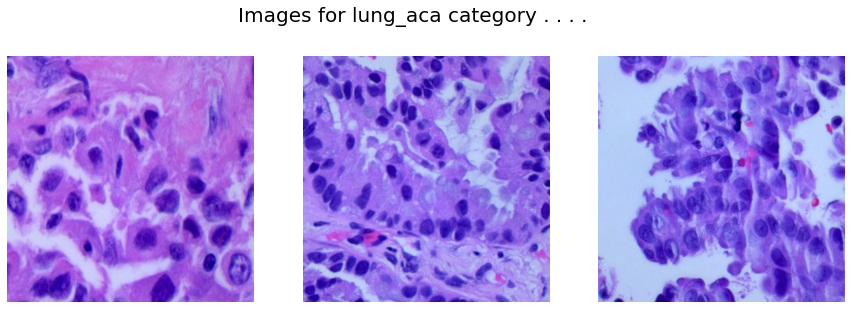

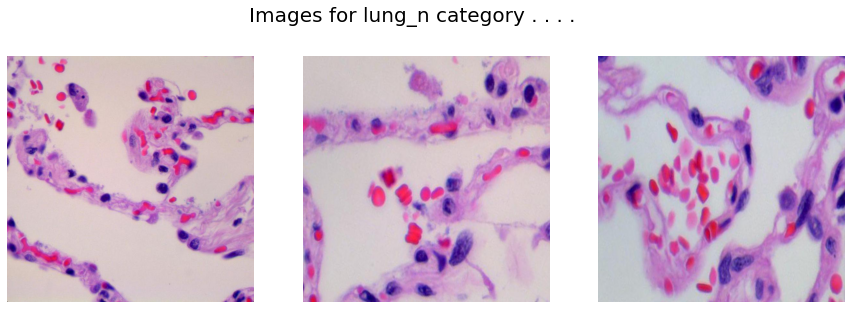

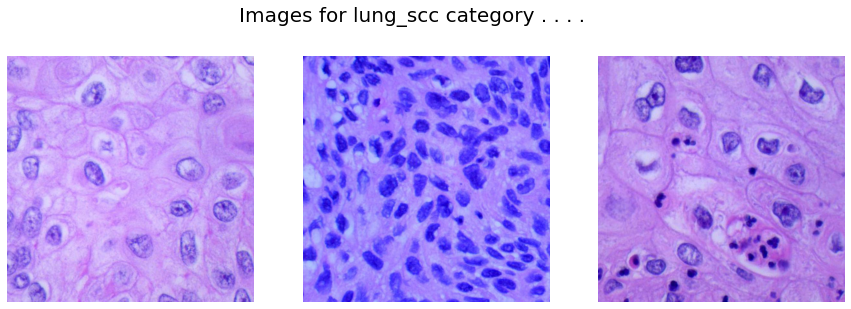

In [11]:
for cat in classes:
    image_dir = f'{path}/{cat}'
    images = os.listdir(image_dir)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

## Data Preparation for Training
We require to convert this images to Numpy Arrays of their pixels after resizing because training a Deep Neural Network on a large size image is highly inefficient in terms of computation and time.

In [12]:
#Resizing the image
IMG_SIZE = 256
SPLIT = 0.2
EPOCHS = 10
BATCH_SIZE = 64


In [13]:
X = []
Y = []

for i, cat in enumerate(classes):
    images = glob(f'{path}/{cat}/*.jpeg')
    
    for image in images:
        img = cv2.imread(image)
        
        if img is not None and img.size != 0:
            resized_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(resized_img)
            Y.append(i)
        else:
            print(f"Error loading or resizing image: {image}")

X = np.asarray(X)
one_hot_encoded_Y = pd.get_dummies(Y).values

Error loading or resizing image: lung_colon_image_set/lung_image_sets/lung_n\lungn1149.jpeg


In [14]:
print(X.shape, one_hot_encoded_Y.shape)

(14999, 256, 256, 3) (14999, 3)


In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(X, one_hot_encoded_Y,test_size = SPLIT,random_state = 2022)
print(X_train.shape, X_val.shape)


(11999, 256, 256, 3) (3000, 256, 256, 3)


## Model Development
TensorFlow library to build our CNN model.
Keras framework of the tensor flow library contains all the functionalities that one may need to define the architecture of a Convolutional Neural Network and train it on the data.

### Model Architecture
We will implement a Sequential model which will contain the following parts:

Three Convolutional Layers followed by MaxPooling Layers.
- The Flatten layer to flatten the output of the convolutional layer.
- Then we will have two fully connected layers followed by the output of the flattened layer.
- We have included some BatchNormalization layers to enable stable and fast training and a Dropout layer before the final layer to avoid any possibility of overfitting.
- The final layer is the output layer which outputs soft probabilities for the three classes. 

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.models.Sequential([
    # Convolutional layers
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3), padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    # Flatten the output for the dense layers
    layers.Flatten(),

    # Dense layers with BatchNormalization and Dropout
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    # Output layer with softmax activation for multiclass classification
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',  
              loss='categorical_crossentropy', 
              metrics=['accuracy'])  


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 128)       0

In [21]:
!pip install graphviz
!pip install pydot

In [24]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your Keras model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
model.compile(
	optimizer = 'adam',
	loss = 'categorical_crossentropy',
	metrics = ['accuracy']
)

In [26]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > 0.90:
            print('\n Validation accuracy has reached upto \
                    90% so, stopping further training.')
            self.model.stop_training = True


es = EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

lr = ReduceLROnPlateau(monitor='val_loss',patience=2,factor=0.5,verbose=1)

In [27]:
history = model.fit(X_train, Y_train,validation_data = (X_val, Y_val),batch_size = BATCH_SIZE,epochs = EPOCHS,verbose = 1,
                    callbacks = [es, lr, myCallback()])


Epoch 1/10
188/188 [==============================] - 1143s 6s/step - loss: 0.3196 - accuracy: 0.8677 - val_loss: 1.2596 - val_accuracy: 0.6477 - lr: 0.0010
Epoch 2/10
188/188 [==============================] - 834s 4s/step - loss: 0.2022 - accuracy: 0.9172 - val_loss: 0.8507 - val_accuracy: 0.6627 - lr: 0.0010
Epoch 3/10
188/188 [==============================] - 835s 4s/step - loss: 0.1800 - accuracy: 0.9297 - val_loss: 5.9233 - val_accuracy: 0.3543 - lr: 0.0010
Epoch 4/10
188/188 [==============================] - ETA: 0s - loss: 0.1408 - accuracy: 0.9443
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
188/188 [==============================] - 819s 4s/step - loss: 0.1408 - accuracy: 0.9443 - val_loss: 0.8643 - val_accuracy: 0.7630 - lr: 0.0010
Epoch 5/10
188/188 [==============================] - 813s 4s/step - loss: 0.0887 - accuracy: 0.9690 - val_loss: 0.8448 - val_accuracy: 0.8320 - lr: 5.0000e-04
Epoch 6/10
188/188 [==============================] - 

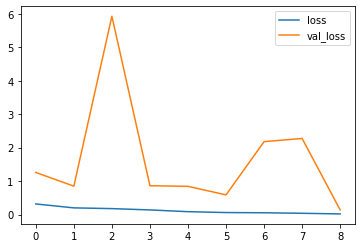

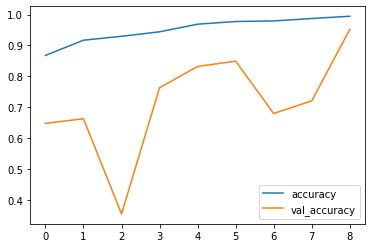

In [28]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

In [29]:
Y_pred = model.predict(X_val)
Y_val = np.argmax(Y_val, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)


94/94 [==============================] - 48s 505ms/step


In [30]:
metrics.confusion_matrix(Y_val, Y_pred)


array([[970,   3,  43],
       [  5, 991,   0],
       [ 93,   0, 895]], dtype=int64)

In [31]:
print(metrics.classification_report(Y_val, Y_pred,target_names=classes))


              precision    recall  f1-score   support

    lung_aca       0.91      0.95      0.93      1016
      lung_n       1.00      0.99      1.00       996
    lung_scc       0.95      0.91      0.93       988

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000

